In [7]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve

In [8]:
xgb = joblib.load(r'..\saved_models\xgb.pkl')
svm = joblib.load(r'..\saved_models\svm.pkl')
gbrt = joblib.load(r'..\saved_models\gbrt.pkl')
mlp = joblib.load(r'..\saved_models\mlp.pkl')

In [9]:
xgb_param = xgb.get_params()
svm_param = svm.get_params()
gbrt_param = gbrt.get_params()
mlp_param = mlp.get_params()

In [10]:
df_train = pd.read_csv(r'..\..\..\Data\隧道围岩项目\训练集.csv')
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]
df_test = pd.read_excel(r'..\..\..\Data\隧道围岩项目\测试集.xlsx', sheet_name='Sheet1')
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [11]:
xgb_param['n_estimators'] = 1000

In [12]:
xgb_new = XGBClassifier(**xgb_param)

d:\program\navigator\envs\Tf\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


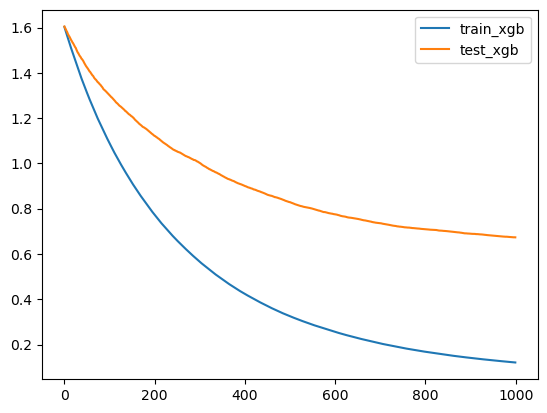

In [13]:
evalset = [(X_train, y_train - 1), (X_test, y_test - 1)]
xgb_new.fit(X_train, y_train - 1,
            eval_metric='mlogloss', eval_set=evalset, verbose=0
            )
yhat = xgb_new.predict(X_test)
score = accuracy_score(y_test - 1, yhat)
print('Accuracy: %.3f' % score)
results = xgb_new.evals_result()
plt.plot(results['validation_0']['mlogloss'], label='train_xgb')
plt.plot(results['validation_1']['mlogloss'], label='test_xgb')
plt.legend()

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5306           0.6338            3.83s
         2           0.1970           0.0107            3.16s
         3           0.1069           0.0548            3.01s
         4           0.0563           0.0278            2.80s
         5           0.0316           0.0118            2.24s
         6           0.0182           0.0089            2.56s
         7           0.0112          -0.0011            2.82s
         8           0.0069          -0.0017            2.77s
         9           0.0038           0.0025            2.64s
        10           0.0023           0.0002            2.78s
        20           0.0000          -0.0000            2.57s
        30           0.0000           0.0000            2.35s
        40           0.0000          -0.0000            2.10s
        50           0.0000          -0.0000            1.84s
        60           0.0000          -0.0000            1.66s
       

Text(0, 0.5, 'Loss')

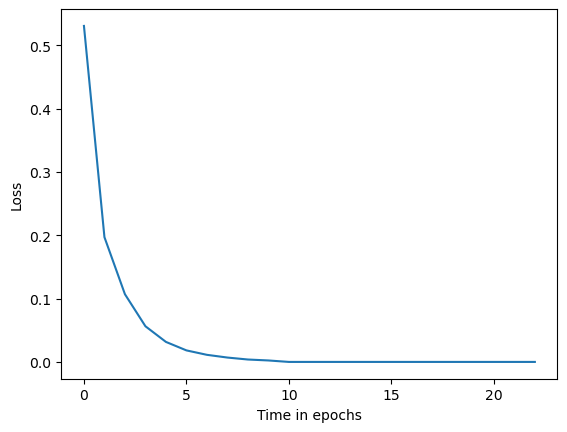

In [93]:
import sys
from io import StringIO
gbrt_param['n_estimators'] = 500
gbrt_param['verbose'] = 1
model = GradientBoostingClassifier(**gbrt_param)
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = model
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print_to_cell(loss_history)
loss_list = []
for i in range(len(loss_history.split('\n')) -1):
    if i == 0:
        continue
    # print_to_cell(loss_history.split('\n')[i].split())
    loss_list.append(float(loss_history.split('\n')[i].split()[1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")

In [86]:
loss_list

['0.5333',
 '0.2082',
 '0.1037',
 '0.0604',
 '0.0374',
 '0.0189',
 '0.0117',
 '0.0061',
 '0.0039',
 '0.0024']

In [6]:
from IPython.display import display

def print_to_cell(text):
    display({"text/plain": text}, raw=True)

print("这条消息将打印到终端")
print_to_cell("这条消息将打印到Jupyter Notebook单元格")

这条消息将打印到Jupyter Notebook单元格

In [17]:
def get_output(model, X_train, y_train):
    sys.stdout = mystdout = StringIO()
    model.fit(X_train, y_train)
    sys.stdout = sys.__stdout__
    return mystdout.getvalue()

output = get_output(model, X_train, y_train)
sys.stdout = sys.__stdout__
type(get_output(model, X_train, y_train))

str

In [74]:
import sys
from io import StringIO
gbrt_param['n_estimators'] = 10
gbrt_param['verbose'] = 1
model = GradientBoostingClassifier(**gbrt_param)
sys.stdout = mystdout = StringIO()
model.fit(X_train, y_train)
sys.stdout = 
print(1)
print('old_stdout is {}'.format(mystdout.getvalue()))
print(2)

In [111]:
mlp_param['solver'] = 'sgd'

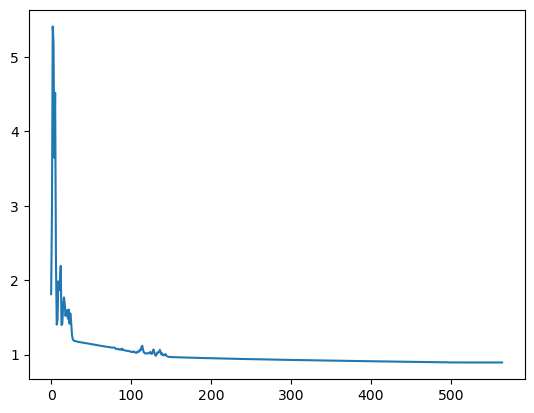

In [124]:
mlp = MLPClassifier(**mlp_param)
mlp.fit(X_train, y_train)
plt.plot(mlp.loss_curve_)

In [123]:
mlp_param['learning_rate_init'] = 0.1